In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from   sklearn.preprocessing import MinMaxScaler

sns.set_context('talk',font_scale=.8)

df = pd.read_csv('data.csv', sep=",", usecols=['total', 'food_products', 'health', 'total_affected'])

df = df.astype(float)
print(df.head)
df.dtypes

<bound method NDFrame.head of       total  food_products    health  total_affected
0     67.34         137.82   5505.52          3500.0
1     68.27         141.21   5448.97        447770.0
2     68.55         141.86   5433.79             0.0
3     68.97         142.90   5425.52             0.0
4     69.29         142.74   5407.59             0.0
..      ...            ...       ...             ...
167  185.41         483.40  11783.37       2700000.0
168  187.59         495.92  11809.29        481901.0
169  190.11         510.70  11801.02         11410.0
170  191.74         519.08  11789.22             0.0
171  191.68         515.08  11802.19             0.0

[172 rows x 4 columns]>


total             float64
food_products     float64
health            float64
total_affected    float64
dtype: object

In [149]:
'''every sklearn's transform's fit() just calculates the parameters 
(e.g. μ and σ in case of StandardScaler) and saves them as an internal objects state. 
Afterwards, you can call its transform() method to apply the transformation to a particular 
set of examples'''
sc = MinMaxScaler()
norm_ts = sc.fit_transform(df)
df_norm = pd.DataFrame(norm_ts) # convert back to a df
df_norm.columns = ['total', 'food_products', 'health', 'total_affected']
print(df_norm.head)

<bound method NDFrame.head of         total  food_products    health  total_affected
0    0.000000       0.000000  0.015289        0.001296
1    0.007476       0.008892  0.006460        0.165841
2    0.009727       0.010596  0.004090        0.000000
3    0.013103       0.013324  0.002799        0.000000
4    0.015675       0.012905  0.000000        0.000000
..        ...            ...       ...             ...
167  0.949116       0.906416  0.995393        1.000000
168  0.966640       0.939254  0.999440        0.178482
169  0.986897       0.978020  0.998148        0.004226
170  1.000000       1.000000  0.996306        0.000000
171  0.999518       0.989508  0.998331        0.000000

[172 rows x 4 columns]>


In [150]:
overall_spearman_r = df_norm.corr(method="spearman")#.iloc[2,3]
print(f"Computed Spearman r correlation matrix\n: {np.round(overall_spearman_r,3)}")

overall_pearson_r = df_norm.corr()
print(f"Computed Pearson r correlation matrix\n: {np.round(overall_pearson_r,3)}")

#r, p = stats.pearsonr(df_norm.dropna()[time_series_1], df_norm.dropna()[time_series_2])
#print(f"Computed Pearson r: {r} and p-value: {p}")

Computed Spearman r correlation matrix
:                 total  food_products  health  total_affected
total           1.000          0.990   0.959           0.031
food_products   0.990          1.000   0.945           0.063
health          0.959          0.945   1.000           0.020
total_affected  0.031          0.063   0.020           1.000
Computed Pearson r correlation matrix
:                 total  food_products  health  total_affected
total           1.000          0.996   0.974           0.159
food_products   0.996          1.000   0.965           0.180
health          0.974          0.965   1.000           0.153
total_affected  0.159          0.180   0.153           1.000


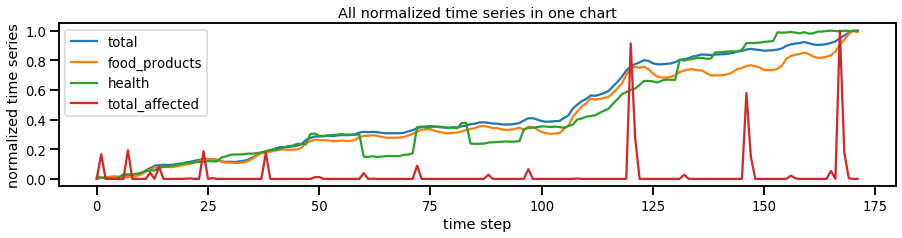

In [151]:
f,ax=plt.subplots(figsize=(15,3))
#df_norm.rolling(window=1,center=True).median().plot(ax=ax)
df_norm.plot(ax=ax)
ax.set(xlabel='time step',ylabel='normalized time series',title='All normalized time series in one chart');

In [154]:
'''found in https://stackoverflow.com/questions/48186624/pandas-rolling-window-spearman-correlation'''
def rolling_spearman_quick(seqa, seqb, window):
    stridea = seqa.strides[0]
    ssa = as_strided(seqa, shape=[len(seqa) - window + 1, window], strides=[stridea, stridea])
    strideb = seqa.strides[0]
    ssb = as_strided(seqb, shape=[len(seqb) - window + 1, window], strides =[strideb, strideb])
    ar = pd.DataFrame(ssa)
    br = pd.DataFrame(ssb)
    ar = ar.rank(1)
    br = br.rank(1)
    corrs = ar.corrwith(br, 1)
    return pad(corrs, (window - 1, 0), 'constant', constant_values=np.nan)

Text(0.5, 0.98, 'Correlation over time for food_products and health')

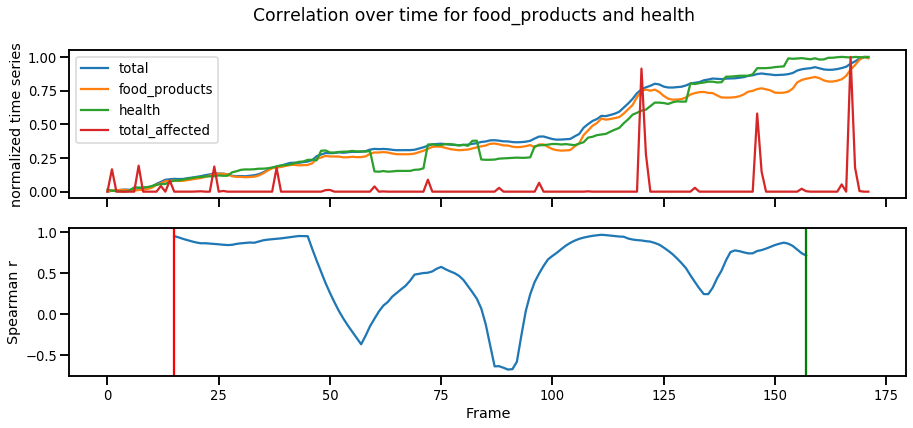

In [153]:
# set the time series
time_series_1='food_products'
time_series_2='health'
#time_series_2='total_affected'

# Set window size to compute moving window of x time steps.
r_window_size = 30

# Interpolate missing data.
df_interpolated = df_norm.interpolate()

# Compute rolling window 
rolling_r = df_interpolated[time_series_1].rolling(window=r_window_size, center=True).corr(df_interpolated[time_series_2])

f,ax=plt.subplots(2,1,figsize=(15,6),sharex=True)
df_interpolated.rolling(window=1,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='time step',ylabel='normalized time series')

rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Spearman r')
plt.axvline(x=r_window_size/2,color="r")
plt.axvline(x=172-(r_window_size/2),color="g")
plt.suptitle(f"Correlation over time for {time_series_1} and {time_series_2}")